In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dummy training data

n_samples = 100
x_dummy = np.linspace(-3, 3, n_samples)

# linear function
y_dummy = 3 * x_dummy + 5 + np.random.uniform(-5, 5, n_samples) # with random noise

# cos() function
# y_dummy = np.cos(x_dummy) + np.random.uniform(-3, 3, n_samples)

print('x_dummy shape:{}, y_dummy shape:{}'.format(x_dummy.shape, y_dummy.shape))

x_dummy shape:(100,), y_dummy shape:(100,)


In [3]:
# two version placeholders

with tf.name_scope(name='input_data'):
    # ORIGINAL version: without shape
    X = tf.placeholder(dtype=tf.float32, name='input_X')
    Y = tf.placeholder(dtype=tf.float32, name='input_y')

    # SHAPE version: each input has the explicit shape
    # X = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='input_X')
    # Y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='input_y')

In [4]:
# score function

with tf.name_scope(name='score_func'):
    # linear regression
    W = tf.Variable(initial_value=tf.random_normal(shape=[1], mean=0.0, stddev=1.0), name='weight')
    b = tf.Variable(initial_value=tf.random_normal(shape=[1], mean=0.0, stddev=1.0), name='bias')
    Y_pred = tf.add(tf.multiply(X, W), b, name='y_pred')

    # polynomial regression
    # Y_pred = tf.Variable(tf.random_normal(shape=[1]), name='y_pred')
    # for pow_i in range(1, 6):
    #    W = tf.Variable(tf.random_normal(shape=[1]), name='weight_%d' % pow_i)
    #    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

In [5]:
# loss function

with tf.name_scope(name='loss_func'):
    # mean squared error loss
    # reduce_mean == reduce_sum / number_of_element
    # tf.pow(a - b, 2) == tf.squared_difference(a, b). 
    #loss = tf.reduce_mean(tf.squared_difference(Y_pred, Y))
    loss = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / n_samples


    # parameters = tf.trainable_variables()
    # loss = tf.add(loss, tf.multiply(1e-6, tf.reduce_sum(tf.square(parameters)))) # L2 norm, ridge regression
    # loss = tf.add(loss, tf.multiply(1e-6, tf.reduce_sum(tf.abs(parameters)))) # L1 norm, lasso regression


# Huber loss
def huber_loss(true_labels, predictions, delta=1.0):
    residual = tf.abs(true_labels - predictions)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.4 * tf.square(delta)
    return tf.where(condition, small_res, large_res)
# loss = tf.reduce_sum(huber_loss(Y, Y_pred)) / 2*n_samples

In [6]:
# optimization
with tf.name_scope(name='optimization'):
    optimizer = tf.train.RMSPropOptimizer(learning_rate=0.01).minimize(loss)
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)    

loss:51.26797866821289
loss:36.43244934082031
loss:25.151464462280273
loss:17.169801712036133
loss:12.093806266784668
loss:9.324257850646973
loss:8.055170059204102
loss:7.527552604675293
loss:7.300674915313721
loss:7.1927947998046875


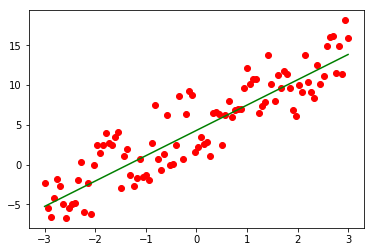

In [7]:
# run
with tf.Session() as sess:
    writer = tf.summary.FileWriter(logdir='./graphs', graph=sess.graph)
    
    sess.run(tf.global_variables_initializer())
    
    for _ in range(10):
        for (x, y) in zip(x_dummy, y_dummy):
            sess.run(optimizer, feed_dict={X:x, Y:y})            
            # SHAPE version
            # sess.run(optimizer, feed_dict={X:x.reshape((1, 1)), Y:y.reshape((1, 1))})
        
        tmp_loss = sess.run(loss, feed_dict={X:x_dummy, Y:y_dummy})
        # SHAPE version
        # tmp_loss = sess.run(loss, feed_dict={X:x_dummy.reshape((100,1)), Y:y_dummy.reshape((100,1))})
        
        print('loss:{}'.format(tmp_loss))
        
    plt.scatter(x_dummy, y_dummy, marker='o', c='r', linewidths=1)    
    plt.plot(x_dummy, Y_pred.eval(feed_dict={X:x_dummy}), 'g')

    # SHAPE version
    # plt.plot(x_dummy, Y_pred.eval(feed_dict={X:x_dummy.reshape((100,1))}), 'g')
writer.close()